# Imaging Performance Comparison (Quiet Sun)
This notebook loops over different noise levels and calibration errors to generate, corrupt, image, and compare solar flare datasets.

In [1]:
import fasr_solar_simul as fss
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1
from scipy.constants import c
import os
from casatasks import tclean, applycal, clearcal
from datetime import datetime
from pathlib import Path
from tqdm import tqdm
from astropy.time import Time
from sunpy import coordinates
from astropy.io import fits

# Speed of light in m/s
C_LIGHT = c
import matplotlib
%matplotlib inline

In [2]:
from importlib import reload

reload(fss)
target = 'Quiet_Sun'
figsubfolder = 'figs/'
model_dir = '../fasr_sim/skymodels/quiet_sun/'

# Imaging Performance Comparison
looping over different noise levels and calibration errors to generate, corrupt, image, and compare

## Set up the simulation

In [65]:
# List of all available frequencies in GHz
freq_list = ['1GHz', '2GHz', '5GHz', '10GHz', '20GHz']
imsizes = [512, 512, 1024, 2048, 4096]
cells = ['4.8arcsec', '4.8arcsec', '2.4arcsec', '1.2arcsec', '0.6arcsec']
scales = [[0, 5, 10, 50], [0, 4, 10, 50], [0, 6, 20, 80, 160], [0, 5, 10, 40, 160], [0, 10, 40, 80, 320]]

selection = [0, 1, 2, 3, 4]
# Revise freq_list, imsizes, cells, and scales using the selection
freq_list = [freq_list[i] for i in selection]
imsizes = [imsizes[i] for i in selection]
cells = [cells[i] for i in selection]
scales = [scales[i] for i in selection]


# List of configurations
project = 'FASR-A'
#config_files = ['fasr_Log_Spiral-168.cfg', 'fasr-a_random_spiral_hybrid_120.cfg']
config_files = ['fasr-a_random_spiral_hybrid_120.cfg']

## Antenna temperature noise levels
tsys_all = [300.]

## Define the fractional gain errors tuples: (phase and amplitude)
# 6 degrees (or 1.7% of phase error is equivalent to 10% of amplitude error )
cal_errors = [(0.1, 0.1)]

# Define channel width and integration time
channel_width_mhz = 24. # channel width in MHz
integration_time = 1. # Time per integration in seconds
duration = 1. # Total imaging duration in seconds

# Reference timestamp for the observation series
reftime='2020-11-26T20:45:47'
solar_radius_asec = coordinates.sun.angular_radius(reftime).value

# Flags to control overwriting existing data products
overwrite_ms   = False  # Overwrite measurement set?
overwrite_im   = False  # Overwrite image products?
overwrite_plot = True  # Overwrite existing plots?

weighting = 'uniform'
# Deconvolution algorithm choice
#deconvolver = 'hogbom'
#niter = 0

deconvolver = 'multiscale'
niter = 10000
 

## Mask Models based on background levels

In [ ]:
reload(fss)
freq_list=['1GHz', '2GHz', '4GHz', '5GHz', '8GHz','10GHz', '15GHz','20GHz']
radius_cutoffs = []
for freqstr in freq_list:
    solar_model = f'{model_dir}/solar_disk_model_20201126.{freqstr}.fits'
    radius_list, mean_intensity_profile, background_level, radius_cutoff = fss.calc_model_radial_profile(solar_model, dr=20, tb_min=100., bkg_radius_range=[1.4, 1.6], snr_min=1.1, apply_mask=True)
    radius_cutoffs.append(radius_cutoff)

In [30]:
from astropy.io import fits
solar_model_5ghz = f'{model_dir}/solar_disk_model_20201126.5GHz.fits'
hdul = fits.open(solar_model)
header = hdul[0].header
header['CRVAL3'] = 5.01827669e9
hdul.writeto(solar_model_5ghz, overwrite=True)
hdul.close()

## Simulate visibility and do imaging

Total flux within primary beam used to calcuate the antenna temperature: 21.6 sfu
Tant: 83K
21.648125
Calculate antenna temperature from total flux 21.648125 sfu incident on the dish
Total noise temperature (K): 3.831e+02 K
Estimated SEFD: 1.072e+06 Jy
Estimated natural weighting point source sensitivity sigma_na: 1.295e+00 Jy/beam
Estimated uniform weighting point source sensitivity sigma_un: 2.077e+00 Jy/beam
Estimated noise per baseline per channel per polarization per integration: 1.548e+02 Jy for 7140 baselines
Start plotting
Applying a mask of 1.4 solar radii to calcuate rms outside of it.
Peak of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_1GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image: 1.362e+06 K
rms of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_1GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image (excluding solar disk): 6.781e+03 K
SNR of the image: 200.8
Peak of solar_disk_model_20201126.1GHz.masked.im:

/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:3194: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.add_patch(ell)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:3239: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.tight_layout()


'plot_two_casa_images_with_convolution' completed at 2026-02-06 09:49:19; runtime: 0.43 seconds
Start fidelity evaluation
RMS noise in the restored image: 6.2
Fidelity Image Statistics - Peak: 179.55, Mean: 5.90, Median: 4.45, Std Dev: 9.03, SNR: 201.31


2026-02-06 14:49:20	WARN	imregrid::ImageRegrid::regrid	You are regridding an image whose beam is not well sampled by the pixel size.  Total flux can be lost when regridding such images, especially when the new pixel size is larger than the old pixel size. It is recommended to check the total flux of your input and output image, and if necessary rebin the input to have smaller pixels.
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2856: UserWarning: FixedFormatter should only be used together with FixedLocator
  # 4. Generate the Plot


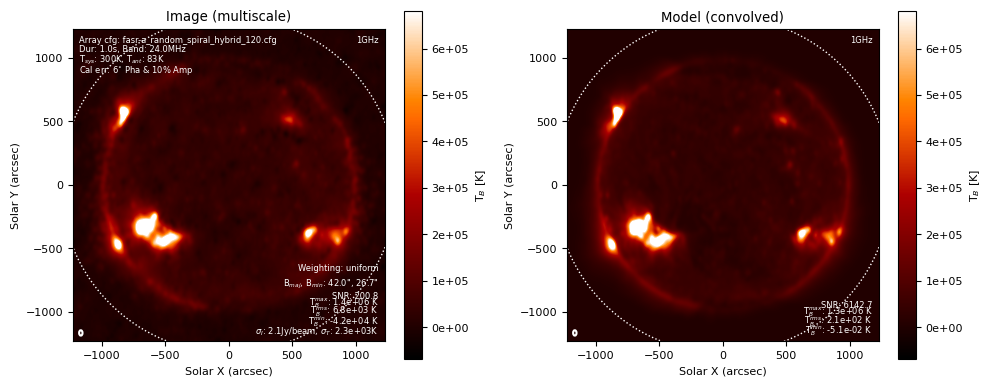

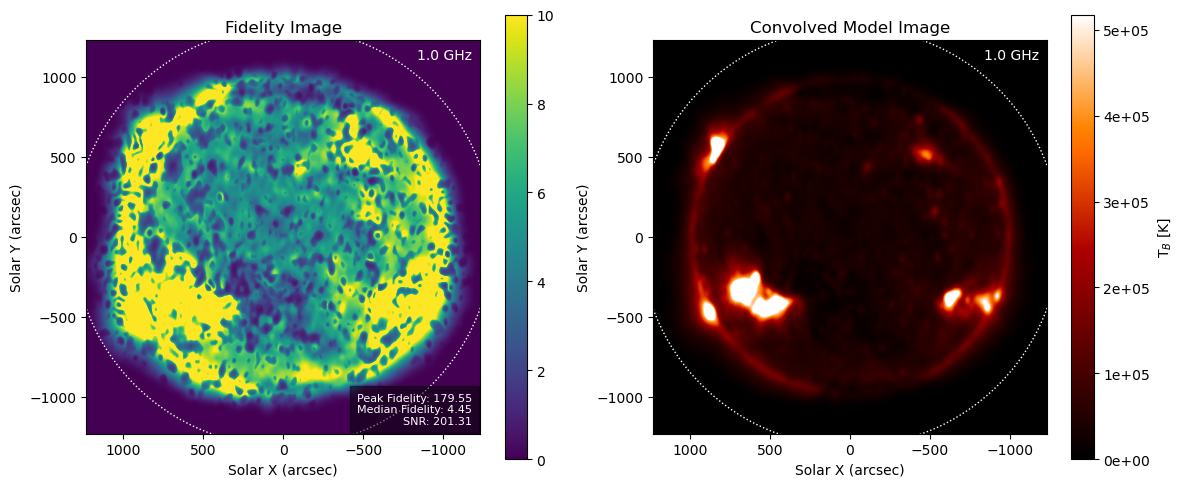

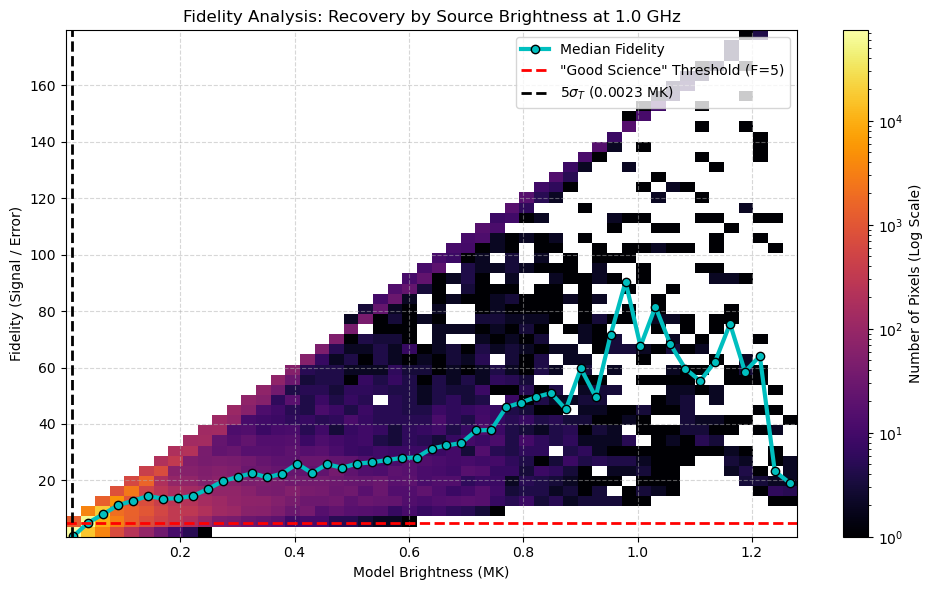

Total flux within primary beam used to calcuate the antenna temperature: 29.4 sfu
Tant: 113K
29.432328125
Calculate antenna temperature from total flux 29.432328125 sfu incident on the dish
Total noise temperature (K): 4.130e+02 K
Estimated SEFD: 1.156e+06 Jy
Estimated natural weighting point source sensitivity sigma_na: 1.396e+00 Jy/beam
Estimated uniform weighting point source sensitivity sigma_un: 1.847e+00 Jy/beam
Estimated noise per baseline per channel per polarization per integration: 1.669e+02 Jy for 7140 baselines
Start plotting
Applying a mask of 1.3 solar radii to calcuate rms outside of it.
Peak of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_2GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image: 5.752e+05 K
rms of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_2GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image (excluding solar disk): 3.344e+03 K
SNR of the image: 172.0
Peak of solar_disk_model_20201126.2GHz.mas

/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:3194: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.add_patch(ell)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:3239: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.tight_layout()


'plot_two_casa_images_with_convolution' completed at 2026-02-06 09:49:23; runtime: 0.38 seconds
Start fidelity evaluation
RMS noise in the restored image: 4.4
Fidelity Image Statistics - Peak: 160.57, Mean: 4.32, Median: 3.52, Std Dev: 6.35, SNR: 172.53


2026-02-06 14:49:24	WARN	imregrid::ImageRegrid::regrid	You are regridding an image whose beam is not well sampled by the pixel size.  Total flux can be lost when regridding such images, especially when the new pixel size is larger than the old pixel size. It is recommended to check the total flux of your input and output image, and if necessary rebin the input to have smaller pixels.
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2856: UserWarning: FixedFormatter should only be used together with FixedLocator
  # 4. Generate the Plot


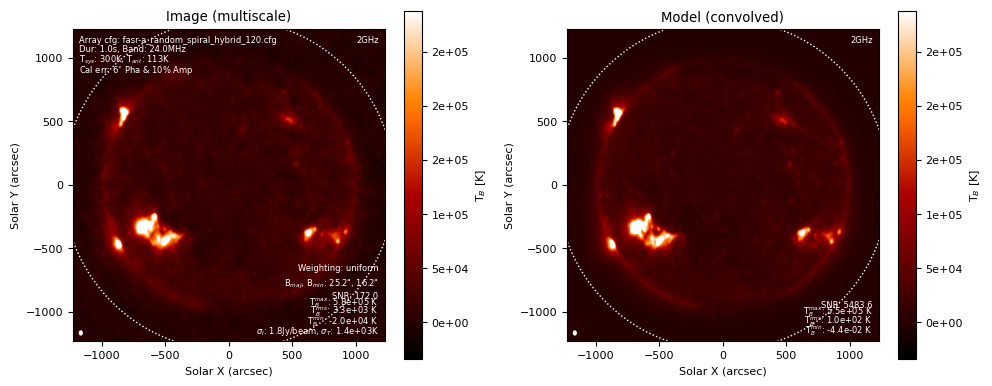

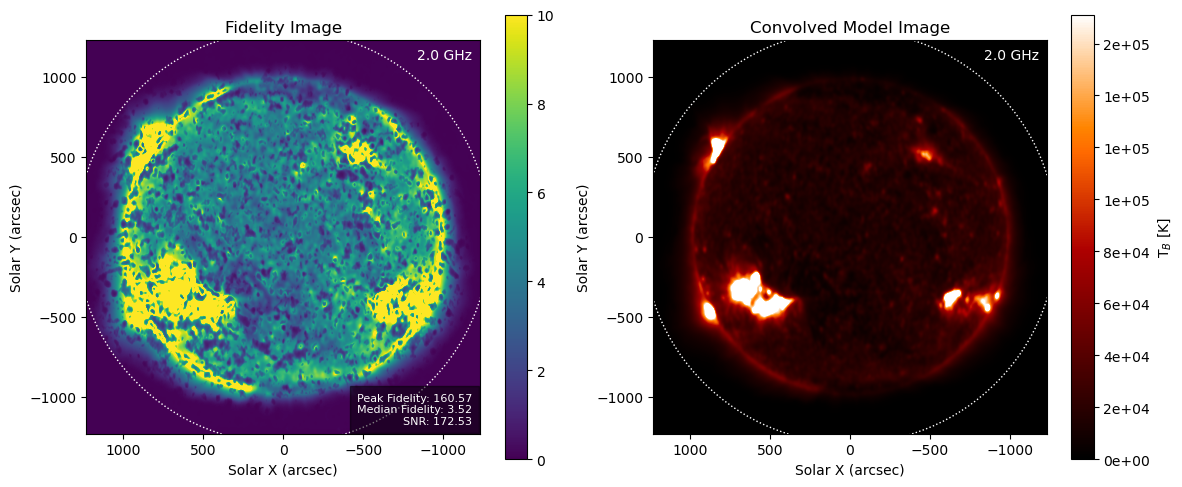

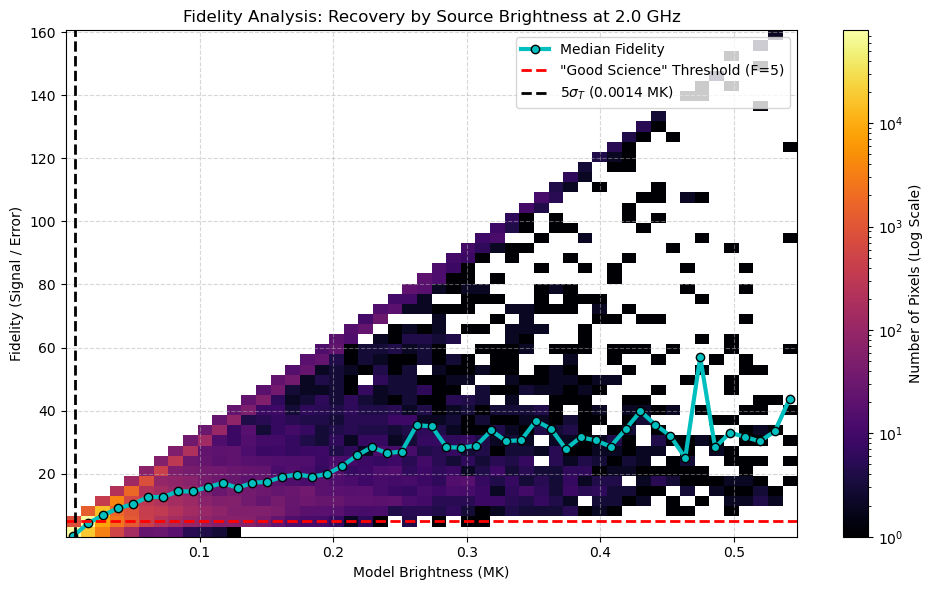

Total flux within primary beam used to calcuate the antenna temperature: 78.1 sfu
Tant: 300K
78.147675
Calculate antenna temperature from total flux 78.147675 sfu incident on the dish
Total noise temperature (K): 6.001e+02 K
Estimated SEFD: 1.680e+06 Jy
Estimated natural weighting point source sensitivity sigma_na: 2.029e+00 Jy/beam
Estimated uniform weighting point source sensitivity sigma_un: 2.270e+00 Jy/beam
Estimated noise per baseline per channel per polarization per integration: 2.424e+02 Jy for 7140 baselines
Start plotting
Applying a mask of 1.3 solar radii to calcuate rms outside of it.
Peak of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_5GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image: 2.936e+05 K
rms of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_5GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image (excluding solar disk): 2.262e+03 K
SNR of the image: 129.8
Peak of solar_disk_model_20201126.5GHz.masked.im

/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:3194: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.add_patch(ell)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:3239: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.tight_layout()


'plot_two_casa_images_with_convolution' completed at 2026-02-06 09:49:26; runtime: 0.46 seconds
Start fidelity evaluation


2026-02-06 14:49:27	WARN	imregrid::ImageRegrid::regrid	You are regridding an image whose beam is not well sampled by the pixel size.  Total flux can be lost when regridding such images, especially when the new pixel size is larger than the old pixel size. It is recommended to check the total flux of your input and output image, and if necessary rebin the input to have smaller pixels.


RMS noise in the restored image: 5.8
Fidelity Image Statistics - Peak: 93.76, Mean: 3.24, Median: 3.04, Std Dev: 3.36, SNR: 130.37


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2856: UserWarning: FixedFormatter should only be used together with FixedLocator
  # 4. Generate the Plot


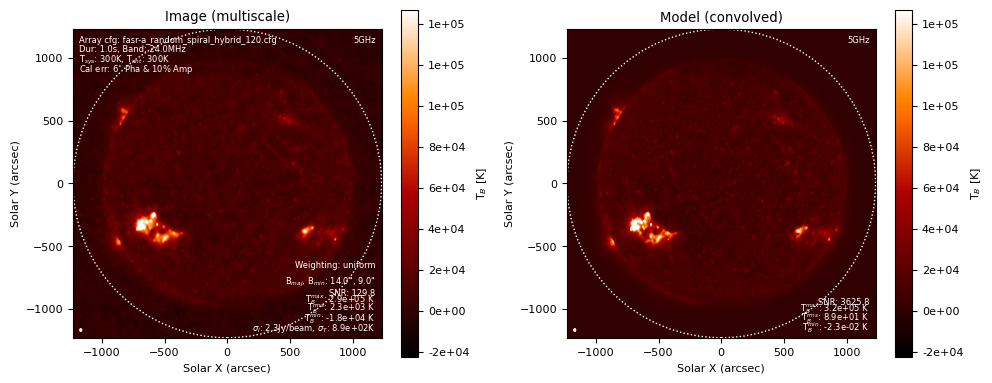

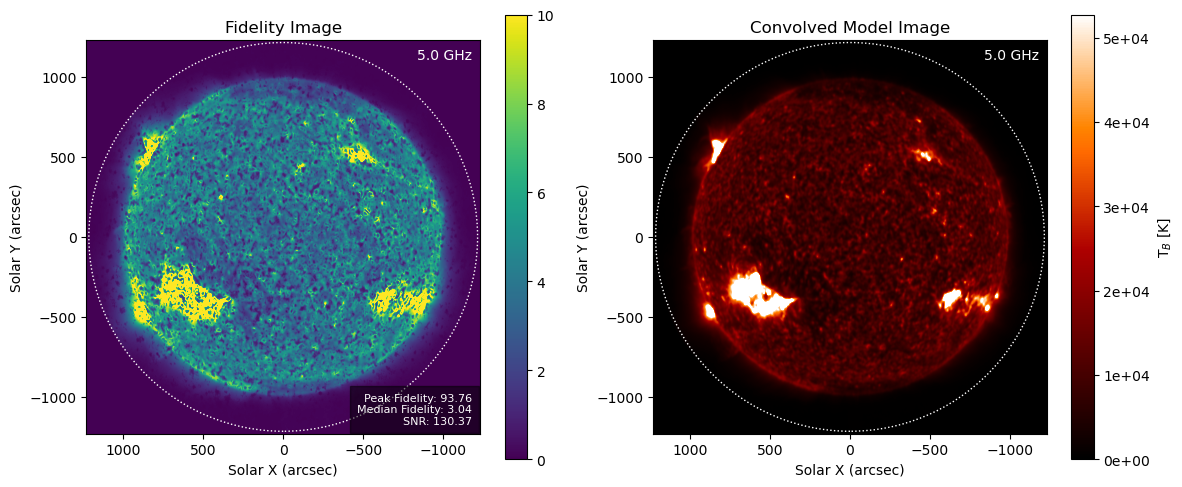

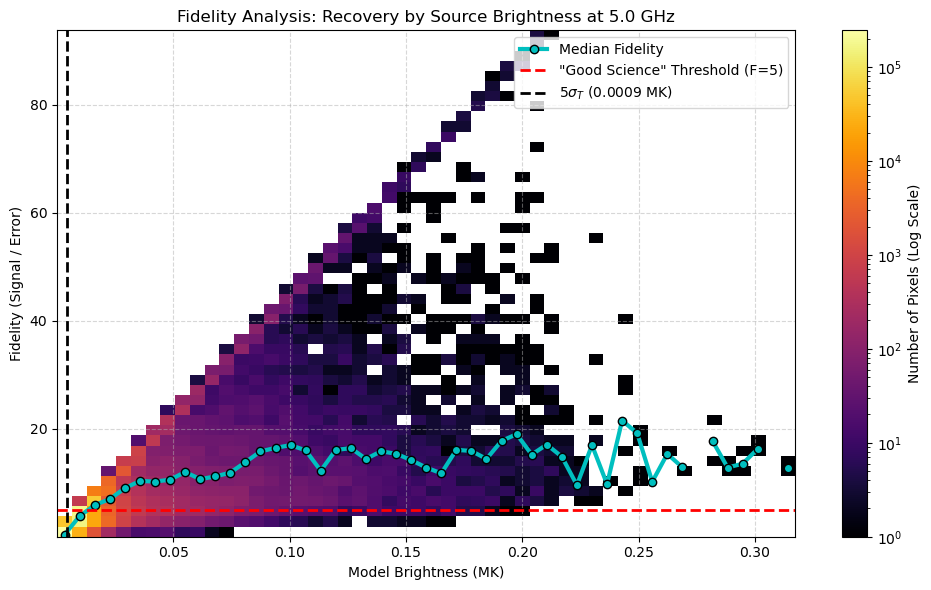

Total flux within primary beam used to calcuate the antenna temperature: 251.9 sfu
Tant: 967K
251.875825
Calculate antenna temperature from total flux 251.875825 sfu incident on the dish
Total noise temperature (K): 1.267e+03 K
Estimated SEFD: 3.547e+06 Jy
Estimated natural weighting point source sensitivity sigma_na: 4.284e+00 Jy/beam
Estimated uniform weighting point source sensitivity sigma_un: 4.489e+00 Jy/beam
Estimated noise per baseline per channel per polarization per integration: 5.119e+02 Jy for 7140 baselines
Start plotting
Applying a mask of 1.2 solar radii to calcuate rms outside of it.
Peak of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_10GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image: 3.686e+05 K
rms of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_10GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image (excluding solar disk): 3.245e+03 K
SNR of the image: 113.6
Peak of solar_disk_model_20201126.10GHz.mas

/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:3194: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.add_patch(ell)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:3239: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.tight_layout()


'plot_two_casa_images_with_convolution' completed at 2026-02-06 09:49:30; runtime: 0.63 seconds
Start fidelity evaluation


2026-02-06 14:49:31	WARN	imregrid::ImageRegrid::regrid	You are regridding an image whose beam is not well sampled by the pixel size.  Total flux can be lost when regridding such images, especially when the new pixel size is larger than the old pixel size. It is recommended to check the total flux of your input and output image, and if necessary rebin the input to have smaller pixels.


RMS noise in the restored image: 15.1
Fidelity Image Statistics - Peak: 105.00, Mean: 2.13, Median: 1.99, Std Dev: 1.97, SNR: 114.79


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2856: UserWarning: FixedFormatter should only be used together with FixedLocator
  # 4. Generate the Plot


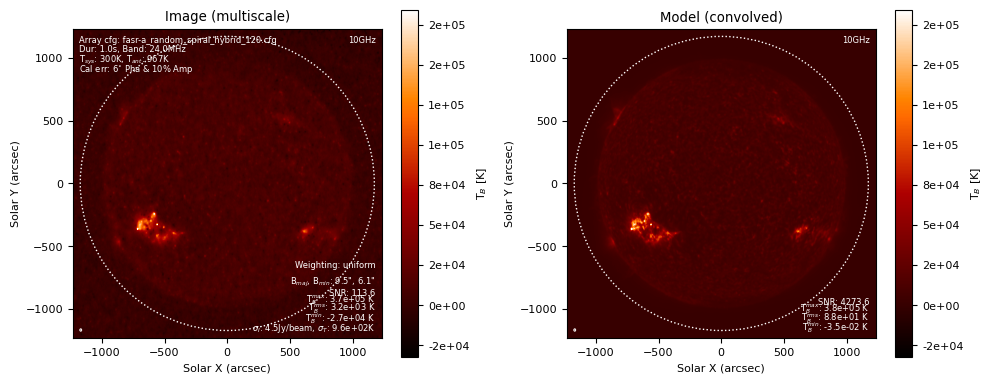

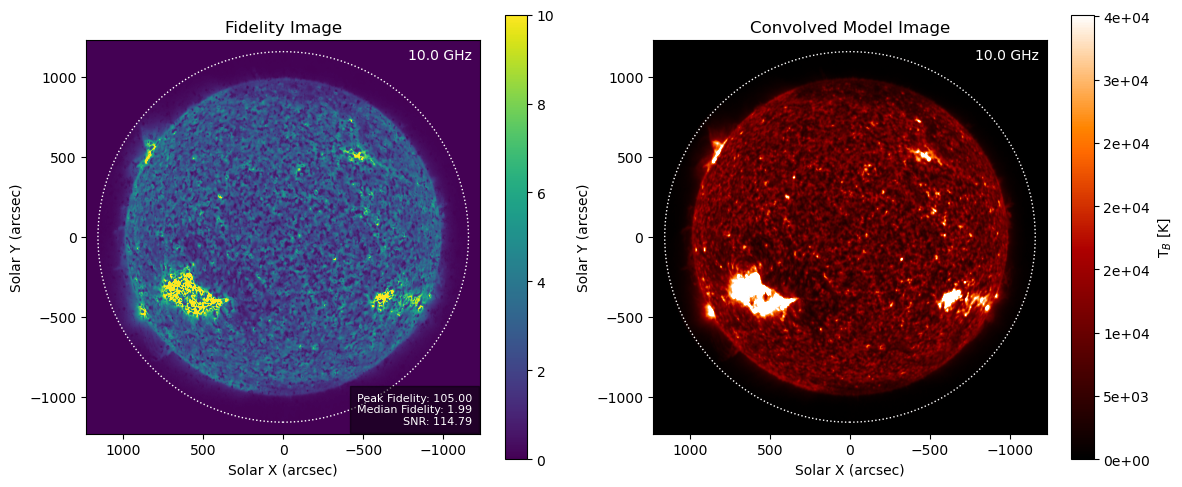

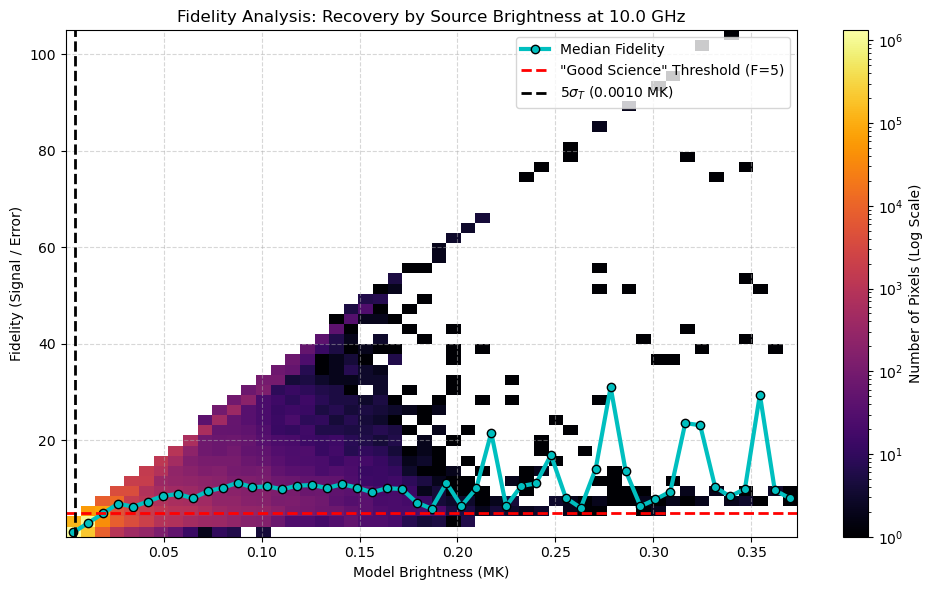

Total flux within primary beam used to calcuate the antenna temperature: 946.5 sfu
Tant: 3634K
946.4776
Calculate antenna temperature from total flux 946.4776 sfu incident on the dish
Total noise temperature (K): 3.934e+03 K
Estimated SEFD: 1.101e+07 Jy
Estimated natural weighting point source sensitivity sigma_na: 1.330e+01 Jy/beam
Estimated uniform weighting point source sensitivity sigma_un: 1.349e+01 Jy/beam
Estimated noise per baseline per channel per polarization per integration: 1.589e+03 Jy for 7140 baselines
Start plotting
Applying a mask of 1.2 solar radii to calcuate rms outside of it.
Peak of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_20GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image: 5.398e+05 K
rms of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_20GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image (excluding solar disk): 4.977e+03 K
SNR of the image: 108.5
Peak of solar_disk_model_20201126.20GHz.masked

/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:3194: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.add_patch(ell)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:3239: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.tight_layout()


'plot_two_casa_images_with_convolution' completed at 2026-02-06 09:49:37; runtime: 1.98 seconds
Start fidelity evaluation
RMS noise in the restored image: 41.0
Fidelity Image Statistics - Peak: 116.99, Mean: 1.15, Median: 1.00, Std Dev: 1.10, SNR: 117.59


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2856: UserWarning: FixedFormatter should only be used together with FixedLocator
  # 4. Generate the Plot


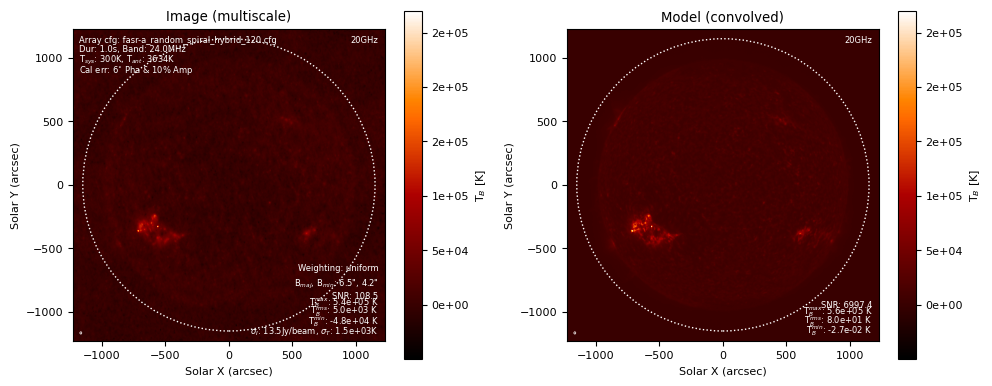

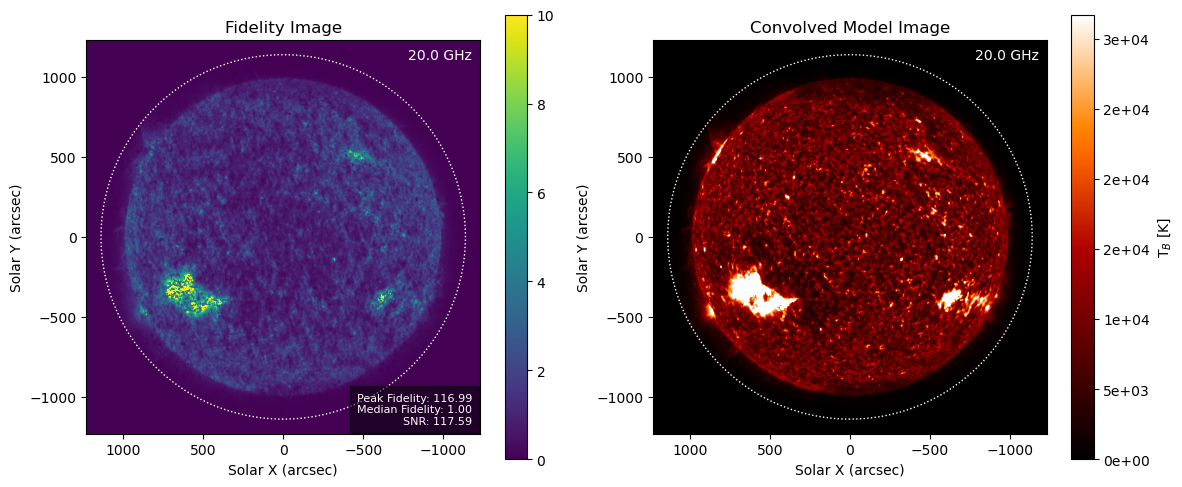

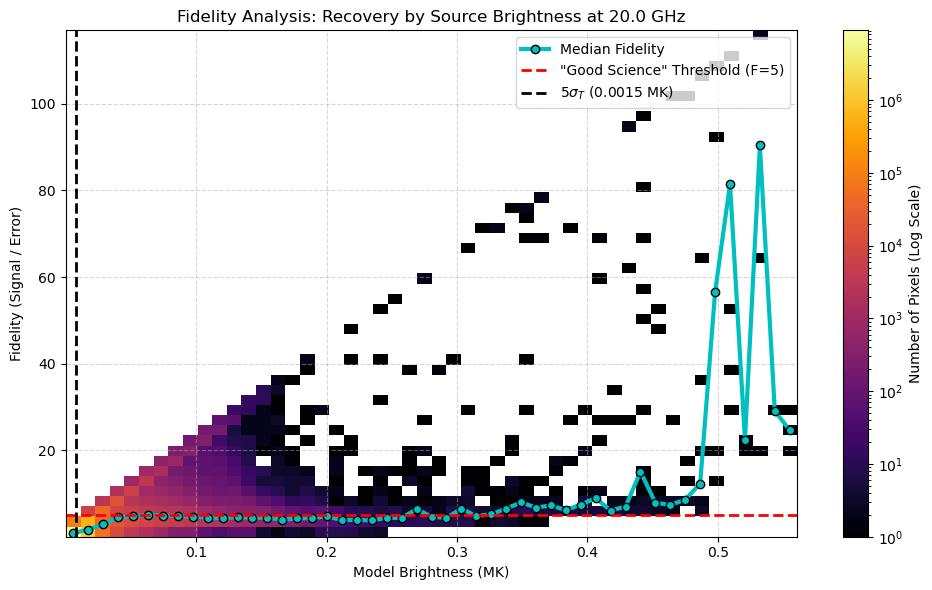

In [76]:
%matplotlib inline
reload(fss)

import time

reftime_casa = Time(reftime).strftime('%Y/%m/%d/%H:%M:%S')

figdir = os.path.join(project, figsubfolder)
if not os.path.exists(figdir):
    os.makedirs(figdir)
    
caltbdir = os.path.join(project, 'caltbs')
if not os.path.exists(caltbdir):
    os.makedirs(caltbdir)

for config_file in config_files:
    cfg_suffix = os.path.basename(config_file.rstrip(".cfg"))
    for freqstr, imsize, cell, scale in zip(freq_list, imsizes, cells, scales):
        solar_model = f'{model_dir}/solar_disk_model_20201126.{freqstr}.masked.fits'
        for tsys in tsys_all:
            # Calculate theoretical sensitivity with natural weighting
            antenna_params = np.genfromtxt(config_file, comments='#')
            dish_diameter = antenna_params[0, 3]
            uv_cell = 1. / (imsize * float(cell.rstrip('arcsec')) / 206265.)
            total_flux = fss.calc_total_flux_on_dish(solar_model, dish_diameter=dish_diameter, freqghz=freqstr)
            tant = fss.total_flux_to_tant(total_flux, eta_a=0.6, dish_diameter=dish_diameter)
            print(f'Tant: {tant:.0f}K')
            noisejy, sigma_na, sigma_un = fss.calc_noise(tsys, config_file, dish_diameter=dish_diameter, 
                                                         total_flux=total_flux, duration=duration,
                                                         integration_time=integration_time, 
                                                         channel_width_mhz=channel_width_mhz, 
                                                         freqghz=freqstr, uv_cell=uv_cell)
            sigma_jy = sigma_un / np.sqrt((duration / integration_time))
                
            for phaerr, amperr in cal_errors:
                phaerr_deg = np.rad2deg(phaerr)
                gaintable = [f'caltb_FASR_corrupt_{phaerr_deg:.0f}deg.ph',
                             f'caltb_FASR_corrupt_{np.int_(amperr * 100)}pct.amp']
                msname = fss.make_msname(project, target, freqstr, Time(reftime).datetime, duration, integration_time, config_file, tsys)
                imname = fss.make_imname(msname, deconvolver, phaerr, amperr)
                if niter == 0:
                    imname = imname.replace(deconvolver, 'dirty')
                msfile = f'{msname}.ms'
                if os.path.exists(msfile):
                    if overwrite_ms:
                        os.system('rm -rf ' + msfile)
                    else:
                        pass
                
                if not os.path.exists(msfile):
                    print('Start generating ms')
                    msfile = fss.generate_ms(config_file, solar_model, reftime_casa, freqstr, integration_time=integration_time,
                                    duration=duration, channel_width_mhz=channel_width_mhz, 
                                    msname=msfile, tsys=tsys, usehourangle=True)

                if os.path.exists(f'{imname}.image'):
                    if overwrite_im:
                        junk = ['.image', '.model', '.mask', '.pb', '.psf', '.residual', '.sumwt']
                        for j in junk:
                            os.system(f'rm -rf {imname}{j}')

                if not os.path.exists(f'{imname}.image'):
                    tstart = time.time()
                    print('Start deconvolution')
                    if not os.path.exists(gaintable[0]):
                        gaintable = fss.generate_caltb(msfile, caltype=['ph', 'amp'], 
                                                       calerr=[phaerr, amperr], caltbdir=caltbdir)
                    clearcal(vis=msfile)
                    applycal(vis=msfile, gaintable=gaintable, applymode='calonly', calwt=False)
                    if deconvolver == 'hogbom':
                        tclean(vis=msfile, imagename=imname,
                               datacolumn='corrected',
                               field='', spw='', specmode='mfs', 
                               deconvolver=deconvolver, pblimit=0.01,
                               imsize=imsize, cell=cell,
                               weighting=weighting,
                               niter=niter,
                               interactive=False)
                    elif deconvolver == 'multiscale':
                        tclean(vis=msfile, imagename=imname,
                               datacolumn='corrected',
                               field='', spw='', specmode='mfs', 
                               deconvolver=deconvolver, scales=scale, 
                               gain=0.2, cycleniter=200, minpsffraction=0.1, pblimit=0.01,
                               imsize=imsize, cell=cell,
                               weighting=weighting,
                               niter=niter,
                               interactive=False)                        
                    junk = ['.model', '.mask', '.pb', '.psf', '.residual', '.sumwt']
                    for j in junk:
                        os.system(f'rm -rf {imname}{j}')
                    tend = time.time()
                    print(f'deconvolution completed in {(tend - tstart)/60.:.2f} minutes')
                    

                figname = os.path.join(figdir, f'fig-{os.path.basename(imname)}.jpg')
                #figname = os.path.join(figdir, f'fig-{os.path.basename(imname)}.ar.jpg')
                if os.path.exists(figname):
                    if overwrite_plot:
                        os.system(f'rm -rf {figname}')

                if not os.path.exists(figname):
                    reload(fss)
                    ## cleaned image
                    image1 = imname + '.image'
                    ## model image
                    image2 = os.path.join(project+'/msfiles/Quiet_Sun/', os.path.basename(solar_model.replace('.fits', '.im')))
                    hdul = fits.open(solar_model)
                    header = hdul[0].header
                    radius_cutoff_rsun = header['RADCUT'] / solar_radius_asec
                    hdul.close()
                    ## meta information of the images
                    image_meta = {'title': [f'Image ({deconvolver})', 'Model (convolved)'],
                                  'freq': freqstr.lstrip("0"),
                                  'array_config': config_file,
                                  'tsys': f'{tsys:.0f}K',
                                  'tant': f'{tant:.0f}K',
                                  'sigma_jy': f'{sigma_jy:.1f}Jy/beam',
                                  'cal_error': f'{phaerr_deg:.0f}'+r'$^{\circ}$ Pha' + f' & {np.int_(amperr * 100)}% Amp',
                                  'duration': f'{duration}s',
                                  'bandwidth': f'{channel_width_mhz}MHz',
                                  'weighting': weighting,
                                  }
                    print('Start plotting')
                    fig, axs = fss.plot_two_casa_images_with_convolution(image1, image2,
                                                                         crop_fraction=(0.0, 1.0),
                                                                         #crop_fraction=((0.17, 0.37), (0.25, 0.45)),
                                                                         rms_mask_radius=radius_cutoff_rsun,
                                                                         reftime=reftime,
                                                                         figsize=(15, 4),
                                                                         image_meta=image_meta,
                                                                         cmap='hinodexrt',
                                                                         vmax=50,
                                                                         compare_two=False,
                                                                         contour_levels=[0.025, 0.05, 0.1, 0.2, 0.4,
                                                                                         0.8],
                                                                         conv_tag=f'.{cfg_suffix}',
                                                                         overwrite_conv=False)

                    fig.savefig(figname, dpi=300)
                    
                    # Plot fidelity map
                    print('Start fidelity evaluation')
                    fidelity_image, noise_floor, peak, fig_f, axs_f, fig_stat = fss.fidelity_evaluation(image1, image2.replace('.im', f'.{cfg_suffix}.im.convolved'),
                                       fidelity_image=image1 + '.fidelity', fontsize=10, sigma_jy=sigma_jy,
                                       doconvolve=False, rms_mask_radius=radius_cutoff_rsun, do_plot=True, figsize=(12, 5))
                    fig_f.savefig(figname.replace('.jpg', '.fidelity.jpg'), dpi=300)
                    fig_stat.savefig(figname.replace('.jpg', '.fidelity.stat.jpg'), dpi=300)
                    

Restored image: FASR-A/msfiles/Quiet_Sun/fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_20GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image
Model image: FASR-A/msfiles/Quiet_Sun/solar_disk_model_20201126.20GHz.masked.fasr-a_random_spiral_hybrid_120.im.convolved
RMS noise in the restored image: 41.1
Fidelity Image Statistics - Peak: 116.76, Mean: 1.12, Median: 0.97, Std Dev: 1.10, SNR: 117.36


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2848: UserWarning: FixedFormatter should only be used together with FixedLocator
  for i in range(len(bins) - 1):


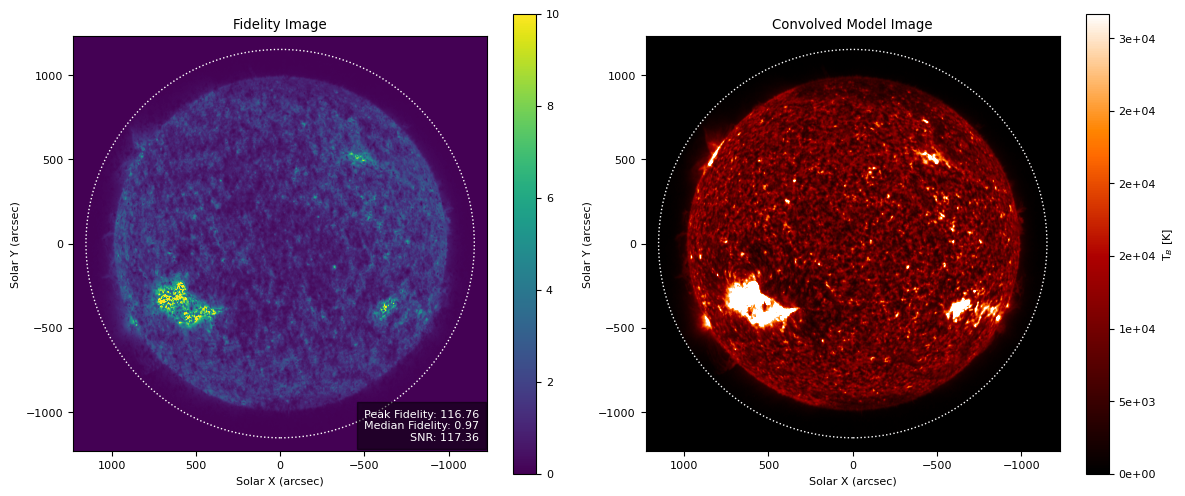

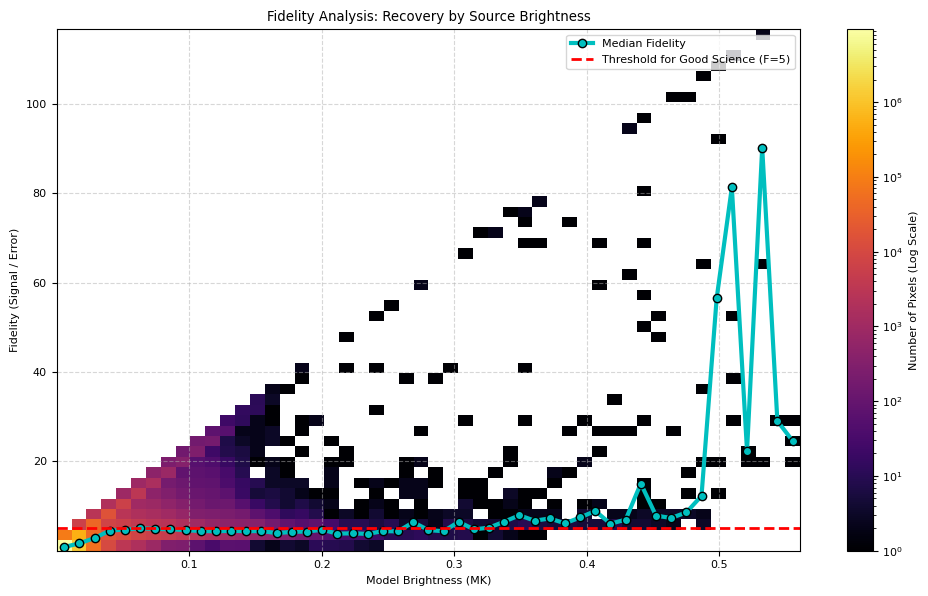

In [67]:
reload(fss)
from casatools import image as IA
ia = IA()
# now use the new module in fss to calculate the fidelity map
print('Restored image:', image1)
print('Model image:', image2.replace('.im', f'.{cfg_suffix}.im.convolved'))
fidelity_image, noise_floor, peak, fig, axs, fig_stat = fss.fidelity_evaluation(image1, image2.replace('.im', f'.{cfg_suffix}.im.convolved'),
                                       fidelity_image=image1 + '.fidelity',
                                       doconvolve=False, rms_mask_radius=1.2, do_plot=True)


In [58]:
ia.coordsys().increment()

2026-02-06 13:51:57	SEVERE	image::_detached (file src/tools/image/image_cmpt.cc, line 1584)	Image is detached - cannot perform operation.
2026-02-06 13:51:57	SEVERE	image::_detached (file src/tools/image/image_cmpt.cc, line 1584)+	Call image.open('filename') to reattach.


{'ar_type': 'absolute',
 'numeric': array([], dtype=float64),
 'pw_type': 'world'}

Regridding FASR-A/msfiles/Quiet_Sun/fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_5GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image to match FASR-A/msfiles/Quiet_Sun/solar_disk_model_20201126.5GHz.masked.im...


2026-02-06 10:44:29	WARN	imregrid::ImageRegrid::regrid	You are regridding an image whose beam is not well sampled by the pixel size.  Total flux can be lost when regridding such images, especially when the new pixel size is larger than the old pixel size. It is recommended to check the total flux of your input and output image, and if necessary rebin the input to have smaller pixels.


Shape of FASR-A/msfiles/Quiet_Sun/fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_5GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image: [1024 1024    1    1]
Shape of regridded model image: [1024 1024    1    1]
Fidelity image created: FASR-A/msfiles/Quiet_Sun/fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_5GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr5.7deg_amperr10pct_multiscale.image.fidelity


/var/folders/vt/1_xmy80j6rg_b46hp_0llx9m0000gn/T/ipykernel_5196/1551312113.py:47: RuntimeWarning: divide by zero encountered in divide
  error_data = (data1 - data2) / data2


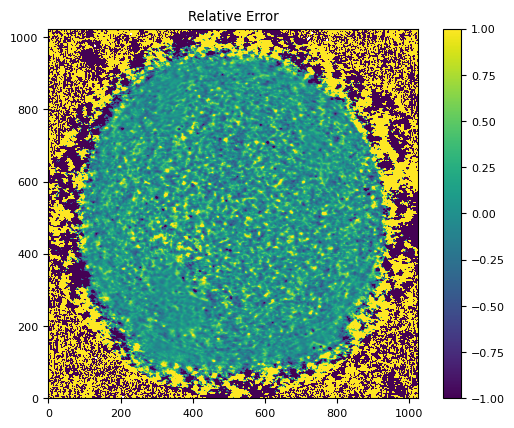

In [32]:
# Compute the fidelity of the images by comparing the output image with the convolved model image
from casatasks import imregrid, imsmooth, immath
from casatools import image
import os

freqstr='5GHz'
cfg_suffix = os.path.basename(config_file.rstrip(".cfg"))

msname = fss.make_msname(project, target, freqstr, Time(reftime).datetime, duration, integration_time, config_file, tsys)
imname = fss.make_imname(msname, deconvolver, phaerr, amperr)
image1 = imname + '.image'
solar_model = f'{model_dir}/solar_disk_model_20201126.{freqstr}.masked.fits'

image2 = os.path.join(project+'/msfiles/Quiet_Sun/', os.path.basename(solar_model).replace('fits', 'im'))
# Define output filenames
model_regrid = image2 + '.regrid'
model_convolved = image2.replace('.im', f'.{cfg_suffix}.im.convolved')
fidelity_image = image1 + '.fidelity'

# Clean up previous runs
for f in [model_regrid, fidelity_image]:
    os.system(f'rm -rf {f}')

# 1. Regrid the model image to match the restored image geometry (pixels, direction)
print(f"Regridding {image1} to match {image2}...")
imregrid(imagename=model_convolved, template=image1, output=model_regrid, overwrite=True)

# Make sure that the regridded model image and image1 has the same shape
ia = image()
ia.open(image1)
shape_image1 = ia.shape()
data1 = ia.getchunk()
print(f"Shape of {image1}: {shape_image1}")
ia.close()

ia.open(model_regrid)
shape_model_regrid = ia.shape()
data2 = ia.getchunk()
print(f"Shape of regridded model image: {shape_model_regrid}")
ia.close()

# 4. Compute Fidelity Image
# Formula: Fidelity = abs(Convolved_Model) / abs(Restored_Image - Convolved_Model)
# We add a small epsilon to the denominator to avoid division by zero
epsilon = 1e-6 
fidelity_data = np.abs(data2) / (np.abs(data1 - data2) + epsilon)
error_data = (data1 - data2) / data2


# Save the fidelity image
os.system(f'cp -r {image1} {fidelity_image}')
ia.open(fidelity_image)
ia.putchunk(fidelity_data)
ia.setbrightnessunit('')  # Set appropriate brightness unit if needed
ia.close()

print(f"Fidelity image created: {fidelity_image}")

plt.imshow(error_data.squeeze(), origin='lower', cmap='viridis', vmin=-1, vmax=1)
plt.title('Relative Error')
plt.colorbar()


## Now do FASR-B simulation using the PSI-MHD-derived model

In [18]:
# List of all available frequencies in GHz
freq_list = ['0.20GHz', '0.40GHz', '1.00GHz', '1.59GHz', '2.00GHz']
imsizes = [512, 512, 512, 512, 512]
cells = ['8arcsec', '8arcsec', '8arcsec', '8arcsec', '8arcsec']
scales = [[0, 4, 10, 50], [0, 4, 10, 40], [0, 4, 10, 40], [0, 4, 10, 40], [0, 4, 10, 40]]

selection = [0, 1, 2, 3, 4]
# Revise freq_list, imsizes, cells, and scales using the selection
freq_list = [freq_list[i] for i in selection]
imsizes = [imsizes[i] for i in selection]
cells = [cells[i] for i in selection]
scales = [scales[i] for i in selection]

# List of configurations
project = 'FASR-B'
config_files = ['fasr-b_spiral_72.cfg']

## Antenna temperature noise levels
tsys_all = [300.]

## Define the fractional gain errors tuples: (phase and amplitude)
# 6 degrees (or 1.7% of phase error is equivalent to 10% of amplitude error )
#cal_errors = [(0., 0.), (0.017, 0.1)]
cal_errors = [(0., 0.)]

# Define channel width and integration time
channel_width_mhz = 10. # channel width in MHz
integration_time = 1. # Time per integration in seconds
duration = 1. # Total imaging duration in seconds

# Reference timestamp for the observation series
reftime='2020-11-26T20:45:47'
solar_radius_asec = coordinates.sun.angular_radius(reftime).value

# Flags to control overwriting existing data products
overwrite_ms   = False  # Overwrite measurement set?
overwrite_im   = False  # Overwrite image products?
overwrite_plot = True  # Overwrite existing plots?

# Deconvolution algorithm choice
weighting = 'uniform'
#deconvolver = 'hogbom'
#niter = 0

deconvolver = 'multiscale'
niter = 10000

Total flux within primary beam used to calcuate the antenna temperature: 8.7 sfu
Tant: 574K
8.7469109375
Calculate antenna temperature from total flux 8.7469109375 sfu incident on the dish
Total noise temperature (K): 8.738e+02 K
Estimated SEFD: 1.432e+05 Jy
Estimated natural weighting point source sensitivity sigma_na: 4.477e-01 Jy/beam
Estimated uniform weighting point source sensitivity sigma_un: 6.219e-01 Jy/beam
Estimated noise per baseline per channel per polarization per integration: 3.201e+01 Jy for 2556 baselines
Start plotting
Applying a mask of 1.6 solar radii to calcuate rms outside of it.
Peak of fasr_fasr-b_spiral_72_Quiet_Sun_0.20GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr0deg_amperr0pct_multiscale.image: 1.224e+06 K
rms of fasr_fasr-b_spiral_72_Quiet_Sun_0.20GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 2.780e+03 K
SNR of the image: 440.3
Peak of psi_solar_disk_model_20201126.0.20GHz.im: 9.588e+05 K
rms of psi_

/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2718: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ctick_labels)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2763: UserWarning: FixedFormatter should only be used together with FixedLocator
  if compare_two:


Total flux within primary beam used to calcuate the antenna temperature: 23.8 sfu
Tant: 1558K
23.7513140625
Calculate antenna temperature from total flux 23.7513140625 sfu incident on the dish
Total noise temperature (K): 1.858e+03 K
Estimated SEFD: 3.044e+05 Jy
Estimated natural weighting point source sensitivity sigma_na: 9.521e-01 Jy/beam
Estimated uniform weighting point source sensitivity sigma_un: 1.105e+00 Jy/beam
Estimated noise per baseline per channel per polarization per integration: 6.807e+01 Jy for 2556 baselines
Start plotting
Applying a mask of 1.6 solar radii to calcuate rms outside of it.
Peak of fasr_fasr-b_spiral_72_Quiet_Sun_0.40GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr0deg_amperr0pct_multiscale.image: 1.768e+06 K
rms of fasr_fasr-b_spiral_72_Quiet_Sun_0.40GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 2.137e+03 K
SNR of the image: 827.1
Peak of psi_solar_disk_model_20201126.0.40GHz.im: 1.370e+06 K
rms of 

/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2718: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ctick_labels)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2763: UserWarning: FixedFormatter should only be used together with FixedLocator
  if compare_two:


Total flux within primary beam used to calcuate the antenna temperature: 70.5 sfu
Tant: 4624K
70.479075
Calculate antenna temperature from total flux 70.479075 sfu incident on the dish
Total noise temperature (K): 4.924e+03 K
Estimated SEFD: 8.066e+05 Jy
Estimated natural weighting point source sensitivity sigma_na: 2.523e+00 Jy/beam
Estimated uniform weighting point source sensitivity sigma_un: 2.598e+00 Jy/beam
Estimated noise per baseline per channel per polarization per integration: 1.804e+02 Jy for 2556 baselines
Start plotting
Applying a mask of 1.6 solar radii to calcuate rms outside of it.
Peak of fasr_fasr-b_spiral_72_Quiet_Sun_1.00GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr0deg_amperr0pct_multiscale.image: 2.226e+06 K
rms of fasr_fasr-b_spiral_72_Quiet_Sun_1.00GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 3.213e+03 K
SNR of the image: 692.9
Peak of psi_solar_disk_model_20201126.1.00GHz.im: 1.755e+06 K
rms of psi_sola

/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2718: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ctick_labels)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2763: UserWarning: FixedFormatter should only be used together with FixedLocator
  if compare_two:


Total flux within primary beam used to calcuate the antenna temperature: 121.5 sfu
Tant: 7973K
121.53025
Calculate antenna temperature from total flux 121.53025 sfu incident on the dish
Total noise temperature (K): 8.273e+03 K
Estimated SEFD: 1.355e+06 Jy
Estimated natural weighting point source sensitivity sigma_na: 4.239e+00 Jy/beam
Estimated uniform weighting point source sensitivity sigma_un: 4.301e+00 Jy/beam
Estimated noise per baseline per channel per polarization per integration: 3.031e+02 Jy for 2556 baselines
Start plotting
Applying a mask of 1.6 solar radii to calcuate rms outside of it.
Peak of fasr_fasr-b_spiral_72_Quiet_Sun_1.59GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr0deg_amperr0pct_multiscale.image: 1.594e+06 K
rms of fasr_fasr-b_spiral_72_Quiet_Sun_1.59GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 5.906e+03 K
SNR of the image: 269.9
Peak of psi_solar_disk_model_20201126.1.59GHz.im: 1.694e+06 K
rms of psi_sol

/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2718: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ctick_labels)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2763: UserWarning: FixedFormatter should only be used together with FixedLocator
  if compare_two:


Total flux within primary beam used to calcuate the antenna temperature: 161.6 sfu
Tant: 10601K
161.5952375
Calculate antenna temperature from total flux 161.5952375 sfu incident on the dish
Total noise temperature (K): 1.090e+04 K
Estimated SEFD: 1.786e+06 Jy
Estimated natural weighting point source sensitivity sigma_na: 5.585e+00 Jy/beam
Estimated uniform weighting point source sensitivity sigma_un: 5.636e+00 Jy/beam
Estimated noise per baseline per channel per polarization per integration: 3.993e+02 Jy for 2556 baselines
Start plotting
Applying a mask of 1.6 solar radii to calcuate rms outside of it.
Peak of fasr_fasr-b_spiral_72_Quiet_Sun_2.00GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr0deg_amperr0pct_multiscale.image: 1.158e+06 K
rms of fasr_fasr-b_spiral_72_Quiet_Sun_2.00GHz_20201126T20UT_dur1s_int1s_noise300K_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 2.242e+04 K
SNR of the image: 51.6
Peak of psi_solar_disk_model_20201126.2.00GHz.im: 1.508e+06 K
rms of psi

/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2718: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ctick_labels)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2763: UserWarning: FixedFormatter should only be used together with FixedLocator
  if compare_two:


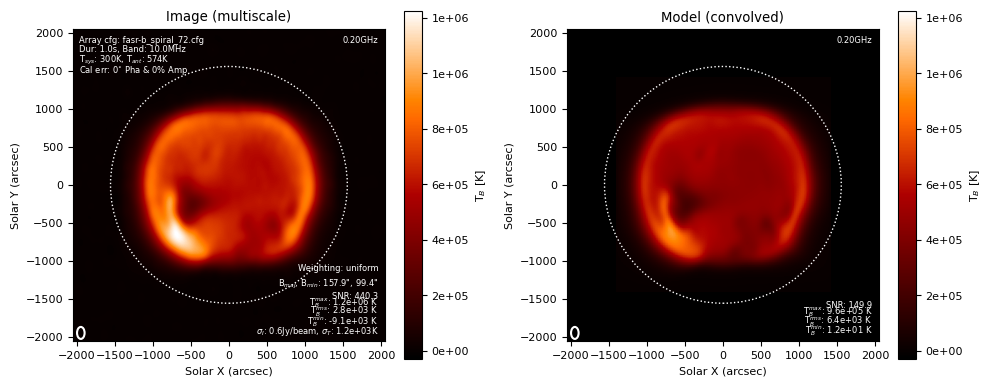

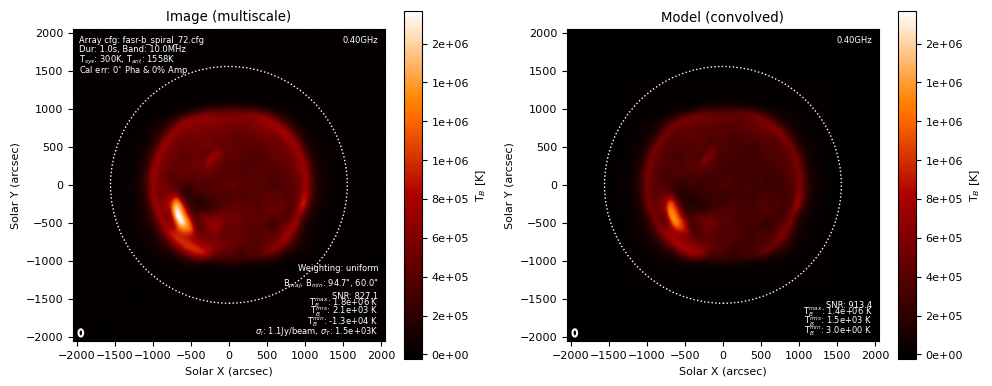

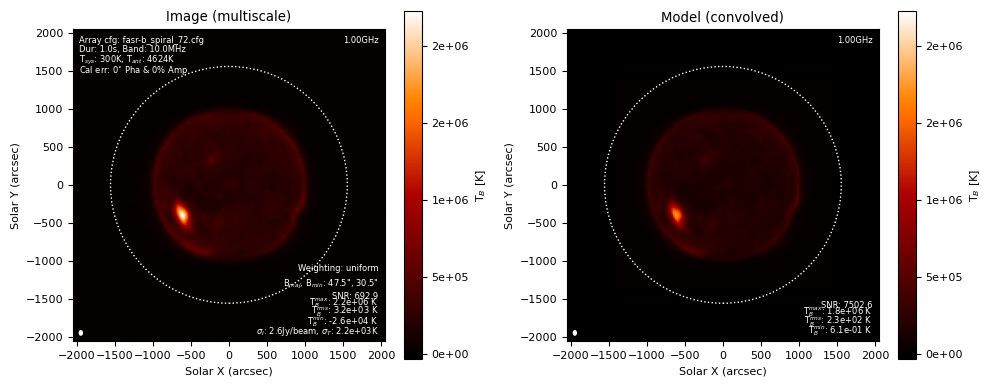

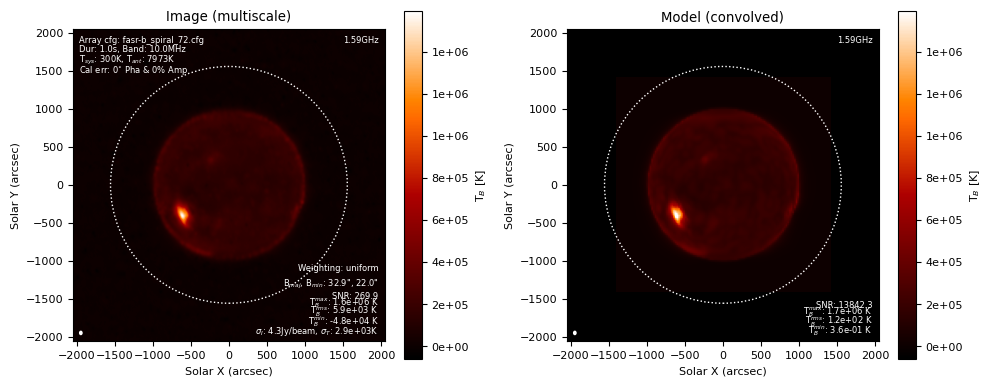

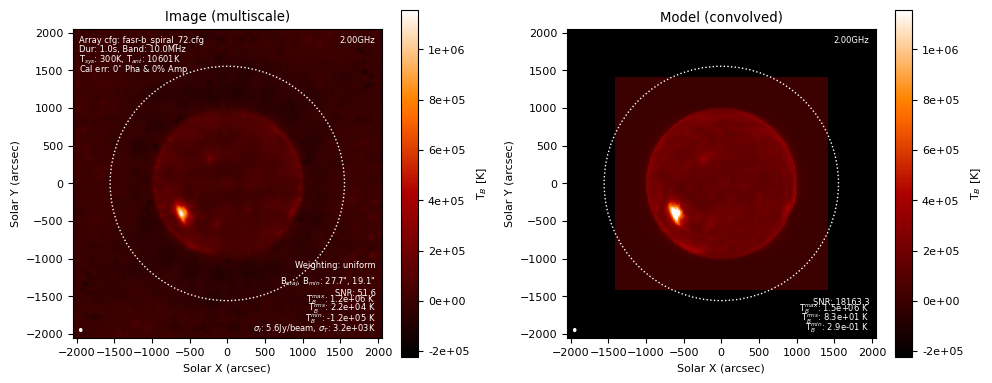

In [20]:
%matplotlib inline
reload(fss)

import time

reftime_casa = Time(reftime).strftime('%Y/%m/%d/%H:%M:%S')

figdir = os.path.join(project, figsubfolder)
if not os.path.exists(figdir):
    os.makedirs(figdir)
    
caltbdir = os.path.join(project, 'caltbs')
if not os.path.exists(caltbdir):
    os.makedirs(caltbdir)

for config_file in config_files:
    cfg_suffix = os.path.basename(config_file.rstrip(".cfg"))
    for freqstr, imsize, cell, scale in zip(freq_list, imsizes, cells, scales):
        solar_model = f'{model_dir}/psi_solar_disk_model_20201126.{freqstr}.fits'
        for tsys in tsys_all:
            # Calculate theoretical sensitivity with natural weighting
            antenna_params = np.genfromtxt(config_file, comments='#')
            dish_diameter = antenna_params[0, 3]
            uv_cell = 1. / (imsize * float(cell.rstrip('arcsec')) / 206265.)
            total_flux = fss.calc_total_flux_on_dish(solar_model, dish_diameter=dish_diameter, freqghz=freqstr)
            tant = fss.total_flux_to_tant(total_flux, eta_a=0.6, dish_diameter=dish_diameter)
            print(f'Tant: {tant:.0f}K')
            noisejy, sigma_na, sigma_un = fss.calc_noise(tsys, config_file, dish_diameter=dish_diameter, 
                                                         total_flux=total_flux, duration=duration,
                                                         integration_time=integration_time, 
                                                         channel_width_mhz=channel_width_mhz, 
                                                         freqghz=freqstr, uv_cell=uv_cell)
            sigma_jy = sigma_un / np.sqrt((duration / integration_time))
                
            for phaerr, amperr in cal_errors:
                phaerr_deg = np.rad2deg(phaerr)
                gaintable = [f'caltb_FASR_corrupt_{phaerr_deg:.0f}deg.ph',
                             f'caltb_FASR_corrupt_{np.int_(amperr * 100)}pct.amp']
                msname = fss.make_msname(project, target, freqstr, Time(reftime).datetime, duration, integration_time, config_file, tsys)
                imname = fss.make_imname(msname, deconvolver, phaerr, amperr)
                if niter == 0:
                    imname = imname.replace(deconvolver, 'dirty')
                msfile = f'{msname}.ms'
                if os.path.exists(msfile):
                    if overwrite_ms:
                        os.system('rm -rf ' + msfile)
                    else:
                        pass
                
                if not os.path.exists(msfile):
                    print('Start generating ms')
                    msfile = fss.generate_ms(config_file, solar_model, reftime_casa, freqstr, integration_time=integration_time,
                                    duration=duration, channel_width_mhz=channel_width_mhz, 
                                    msname=msfile, tsys=tsys, usehourangle=True)

                if os.path.exists(f'{imname}.image'):
                    if overwrite_im:
                        junk = ['.image', '.model', '.mask', '.pb', '.psf', '.residual', '.sumwt']
                        for j in junk:
                            os.system(f'rm -rf {imname}{j}')

                if not os.path.exists(f'{imname}.image'):
                    tstart = time.time()
                    print('Start deconvolution')
                    if not os.path.exists(gaintable[0]):
                        gaintable = fss.generate_caltb(msfile, caltype=['ph', 'amp'], 
                                                       calerr=[phaerr, amperr], caltbdir=caltbdir)
                    clearcal(vis=msfile)
                    applycal(vis=msfile, gaintable=gaintable, applymode='calonly', calwt=False)
                    if deconvolver == 'hogbom':
                        tclean(vis=msfile, imagename=imname,
                               datacolumn='corrected',
                               field='', spw='', specmode='mfs', 
                               deconvolver=deconvolver, pblimit=0.01,
                               imsize=imsize, cell=cell,
                               weighting=weighting,
                               niter=niter,
                               interactive=False)
                    elif deconvolver == 'multiscale':
                        tclean(vis=msfile, imagename=imname,
                               datacolumn='corrected',
                               field='', spw='', specmode='mfs', 
                               deconvolver=deconvolver, scales=scale, 
                               gain=0.2, cycleniter=200, minpsffraction=0.1, pblimit=0.01,
                               imsize=imsize, cell=cell,
                               weighting=weighting,
                               niter=niter,
                               interactive=False)                        
                    junk = ['.model', '.mask', '.pb', '.psf', '.residual', '.sumwt']
                    for j in junk:
                        os.system(f'rm -rf {imname}{j}')
                    tend = time.time()
                    print(f'deconvolution completed in {(tend - tstart)/60.:.2f} minutes')
                    

                figname = os.path.join(figdir, f'fig-{os.path.basename(imname)}.jpg')
                #figname = os.path.join(figdir, f'fig-{os.path.basename(imname)}.ar.jpg')
                if os.path.exists(figname):
                    if overwrite_plot:
                        os.system(f'rm -rf {figname}')

                if not os.path.exists(figname):
                    reload(fss)
                    ## cleaned image
                    image1 = imname + '.image'
                    ## model image
                    image2 = os.path.join(project+'/msfiles/Quiet_Sun/', os.path.basename(solar_model.replace('.fits', '.im')))
                    ## meta information of the images
                    image_meta = {'title': [f'Image ({deconvolver})', 'Model (convolved)'],
                                  'freq': freqstr,
                                  'array_config': config_file,
                                  'tsys': f'{tsys:.0f}K',
                                  'tant': f'{tant:.0f}K',
                                  'sigma_jy': f'{sigma_jy:.1f}Jy/beam',
                                  'cal_error': f'{phaerr_deg:.0f}'+r'$^{\circ}$ Pha' + f' & {np.int_(amperr * 100)}% Amp',
                                  'duration': f'{duration}s',
                                  'bandwidth': f'{channel_width_mhz}MHz',
                                  'weighting': weighting,
                                  }
                    print('Start plotting')
                    fig, axs = fss.plot_two_casa_images_with_convolution(image1, image2,
                                                                         crop_fraction=(0.0, 1.0),
                                                                         #crop_fraction=((0.17, 0.37), (0.25, 0.45)),
                                                                         rms_mask_radius=1.6,
                                                                         reftime=reftime,
                                                                         figsize=(15, 4),
                                                                         image_meta=image_meta,
                                                                         cmap='hinodexrt',
                                                                         vmax=100,
                                                                         compare_two=False,
                                                                         contour_levels=[0.025, 0.05, 0.1, 0.2, 0.4,
                                                                                         0.8],
                                                                         conv_tag=f'.{cfg_suffix}',
                                                                         overwrite_conv=False)

                    fig.savefig(figname, dpi=300)